### Feed Forward Neual Network for CIFAR-10

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random

import helpers
from Cifar10 import Cifar10

In [2]:
# device configuration // mps appears to be slower than cpu with current pytorch versions
# device = torch.device('mps' if torch.backends.mps.is_available() else ('cuda' if torch.cuda.is_available() else 'cpu'))
# device = torch.device('cpu')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f'Using device {device}')

# consitency in training
torch.manual_seed(1234)
random.seed(1234)

Using device cuda


#### Load Data

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = Cifar10(train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)

testset = Cifar10(train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [4]:
# define Neural Network

class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.ff_layer = nn.Sequential(
            nn.Linear(3 * 32 * 32, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, 10)
        )

    def forward(self, x):

        x = torch.flatten(x, 1) # flatten all dimensions except batch
        
        x = self.ff_layer(x)
        return x


net = Net().to(device)

In [5]:
# Hyper Parameters
num_epochs = 3
learning_rate = 0.001

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
# optimizer = optim.Adam(net.parameters(), lr=learning_rate)

loss_vals, tr_acc, te_acc  = helpers.train_model(net, trainloader, testloader, device, criterion, optimizer, num_epochs)

helpers.evaluate(net, testloader, device)

starting training
[1,  2000] loss: 1.890 tr acc: 0.365 te acc: 0.363
[1,  4000] loss: 1.691 tr acc: 0.436 te acc: 0.422
[1,  6000] loss: 1.626 tr acc: 0.442 te acc: 0.424
[1,  8000] loss: 1.582 tr acc: 0.463 te acc: 0.443
[1, 10000] loss: 1.553 tr acc: 0.478 te acc: 0.456
[2,  2000] loss: 1.456 tr acc: 0.501 te acc: 0.471
[2,  4000] loss: 1.439 tr acc: 0.514 te acc: 0.481
[2,  6000] loss: 1.437 tr acc: 0.524 te acc: 0.488
[2,  8000] loss: 1.427 tr acc: 0.523 te acc: 0.486
[2, 10000] loss: 1.431 tr acc: 0.536 te acc: 0.493
[3,  2000] loss: 1.315 tr acc: 0.546 te acc: 0.490
[3,  4000] loss: 1.327 tr acc: 0.545 te acc: 0.487
[3,  6000] loss: 1.313 tr acc: 0.574 te acc: 0.518
[3,  8000] loss: 1.308 tr acc: 0.570 te acc: 0.507
[3, 10000] loss: 1.338 tr acc: 0.573 te acc: 0.504
Finished Training


0.5046

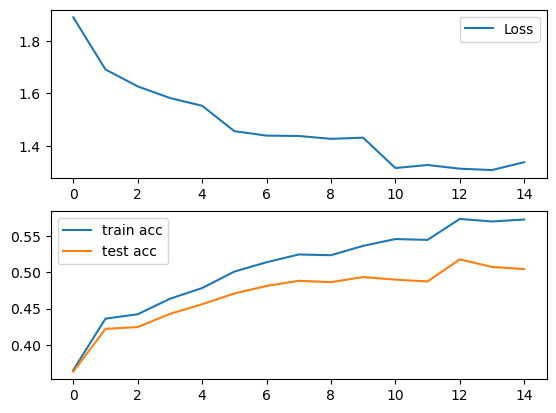

In [6]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(range(len(loss_vals)), loss_vals, label='Loss')
ax2.plot(range(len(loss_vals)), tr_acc, label='train acc')
ax2.plot(range(len(loss_vals)), te_acc, label='test acc')

ax1.legend()
ax2.legend()


plt.show()